In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def change_dtypes(df):
    """
    change types of columns to reduce memory size
    :param df: dataframe
    :return df: dataframe
    """
    memory = df.memory_usage().sum() / 10**6
    print("Memory usage before changing types %0.2f MB" % memory)

    for col in df.columns:
        if (df[col].dtype == "object") and (df[col].nunique() < df.shape[0]):
            df[col] = df[col].astype("category")

        elif df[col].dtype == float:
            df[col] = df[col].astype(np.float32)

        elif df[col].dtype == int:
            df[col] = df[col].astype(np.int32)

    memory = df.memory_usage().sum() / 10 ** 6
    print("Memory usage after changing types %0.2f MB" % memory)
    return df


def load_csv(filename):
    df = pd.read_csv(filename)
    df = change_dtypes(df)
    return df

In [3]:
INP_DIR = "data/download"

In [4]:
df_train = load_csv(os.path.join(INP_DIR, "train.csv"))
df_test = load_csv(os.path.join(INP_DIR, "test.csv"))

print("df_train.shape", df_train.shape)
print("df_test.shape", df_test.shape)

Memory usage before changing types 323.20 MB
Memory usage after changing types 162.40 MB
Memory usage before changing types 321.60 MB
Memory usage after changing types 161.60 MB
df_train.shape (200000, 202)
df_test.shape (200000, 201)


In [76]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.000000,0.000000,0.00000,0.000000,1.000000
var_0,200000.0,10.679973,3.039990,0.408400,8.453850,10.52475,12.758200,20.315001
var_1,200000.0,-1.627628,4.049967,-15.043400,-4.740025,-1.60805,1.358625,10.376800
var_2,200000.0,10.715126,2.640832,2.117100,8.722475,10.58000,12.516700,19.353001
var_3,200000.0,6.796523,2.043276,-0.040200,5.254075,6.82500,8.324100,13.188300
...,...,...,...,...,...,...,...,...
var_195,200000.0,-0.142087,1.429341,-5.261000,-1.170700,-0.17270,0.829600,4.272900
var_196,200000.0,2.303355,5.454274,-14.209600,-1.946925,2.40890,6.556725,18.321501
var_197,200000.0,8.908224,0.921603,5.960600,8.252800,8.88820,9.593300,12.000400
var_198,200000.0,15.870864,3.010892,6.299300,13.829700,15.93405,18.064724,26.079100


In [6]:
df_train.dtypes.value_counts()

float32    200
object       1
int32        1
dtype: int64

In [12]:
df_train.select_dtypes([np.object]).head()

,ID_code
0,train_0
1,train_1
2,train_2
3,train_3
4,train_4


In [11]:
df_train.select_dtypes([np.int32]).head()

,target
0,0
1,0
2,0
3,0
4,0


In [13]:
df_train["target"].mean()

0.10049

In [74]:
df_train.isnull().sum().sum()

0

In [75]:
df_test.isnull().sum().sum()

0

In [87]:
corr_with_target = df_train.drop(["target", "ID_code"], axis="columns").corrwith(df_train["target"]).abs()
corr_with_target = corr_with_target.sort_values(ascending=False)
corr_with_target.head(30)

var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
var_44     0.049039
dtype: float64

In [61]:
def plot_hist(df, var_names, ncols=4):
    var_names = [var for var in var_names if var in df.columns]
    n_vars = len(var_names)
    nrows = int(np.ceil(n_vars / ncols))
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))
    plt.subplots_adjust(hspace=0.3)
    
    ax = ax.flatten()
    
    for i, var in enumerate(var_names):
        sns.histplot(df[var], ax=ax[i])

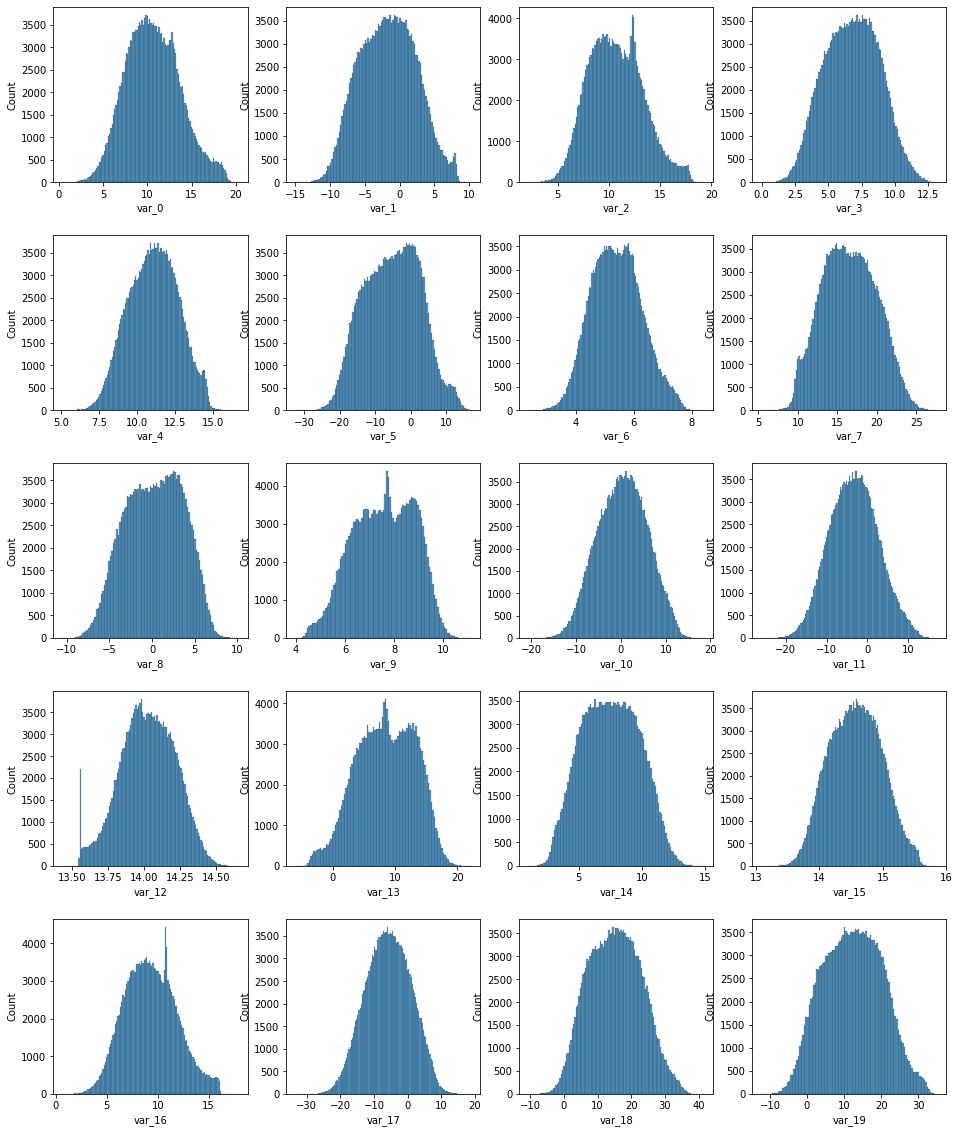

In [64]:
start = 0
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

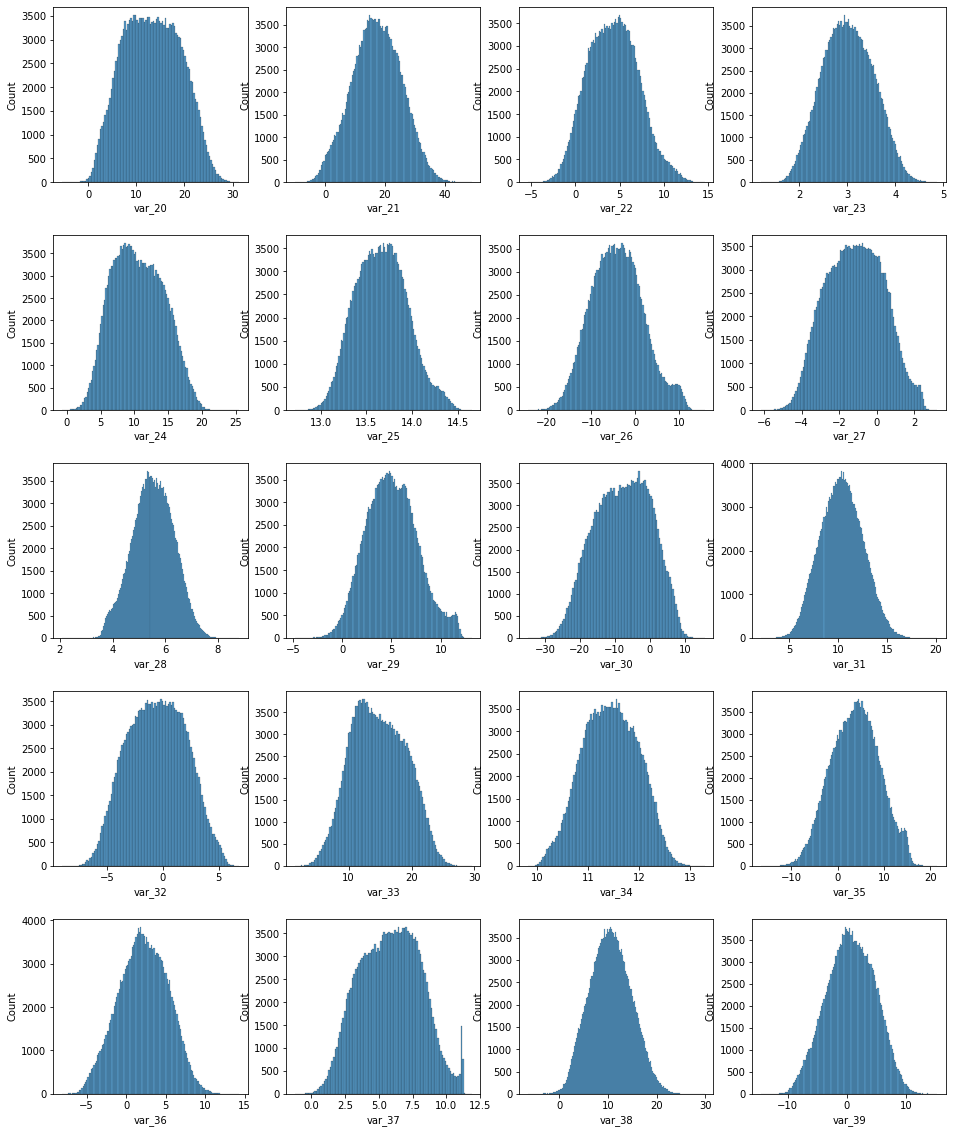

In [65]:
start = 1
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

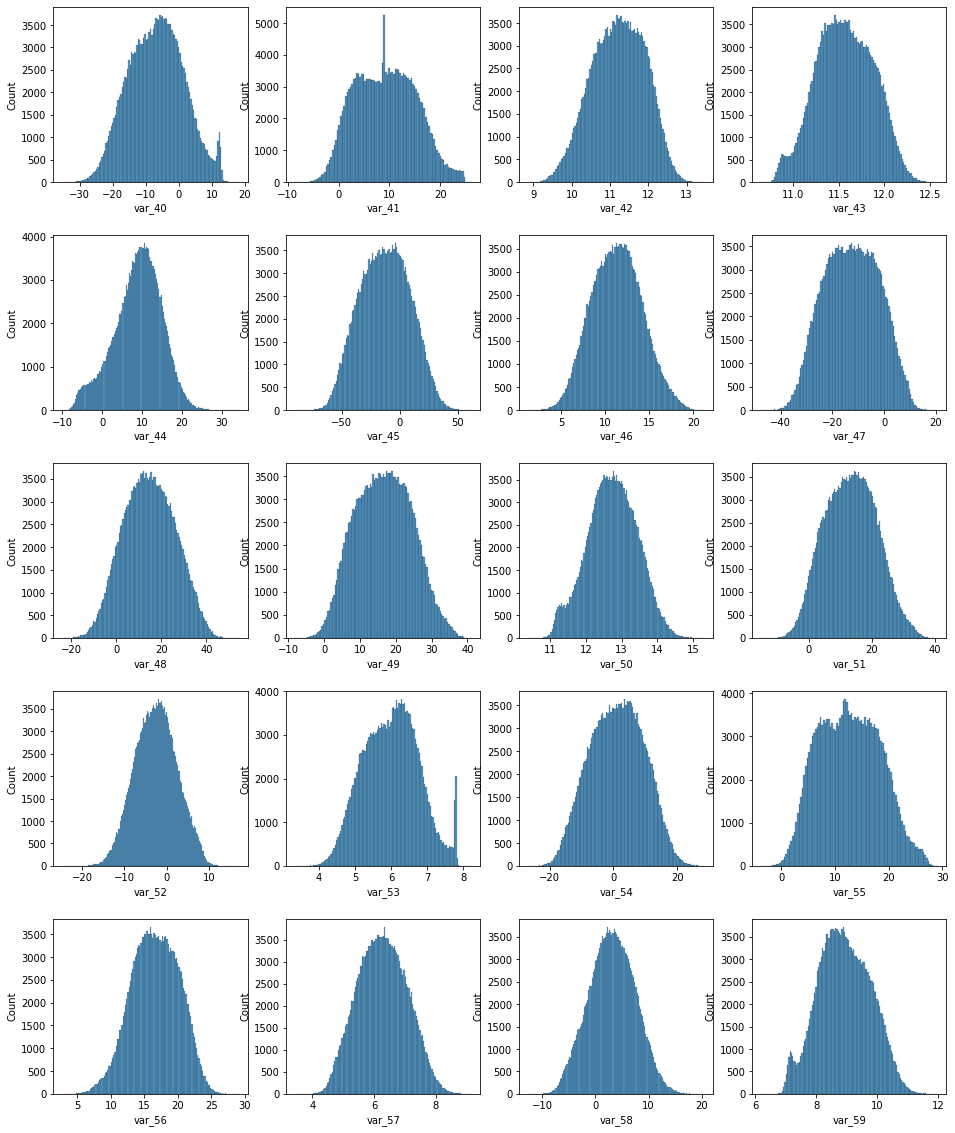

In [66]:
start = 2
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

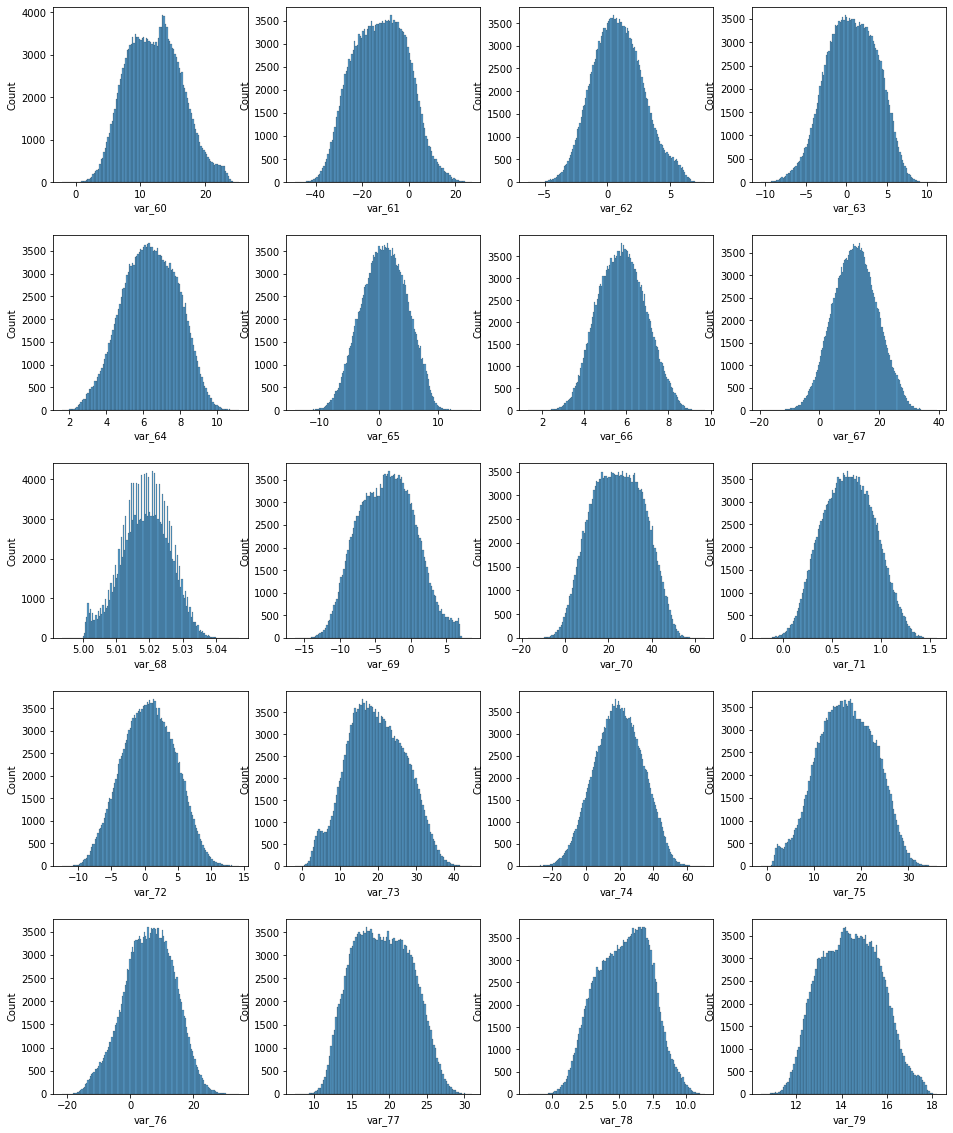

In [67]:
start = 3
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

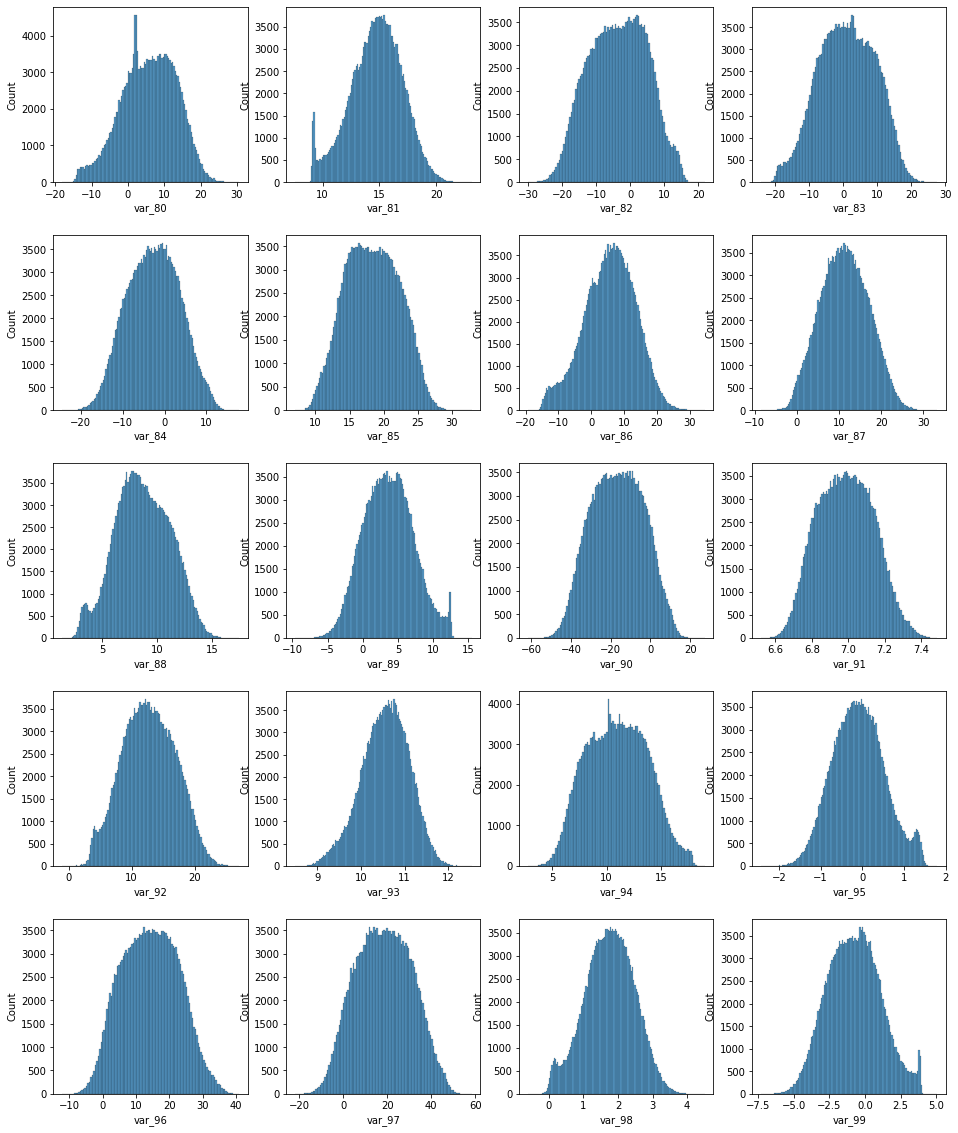

In [68]:
start = 4
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

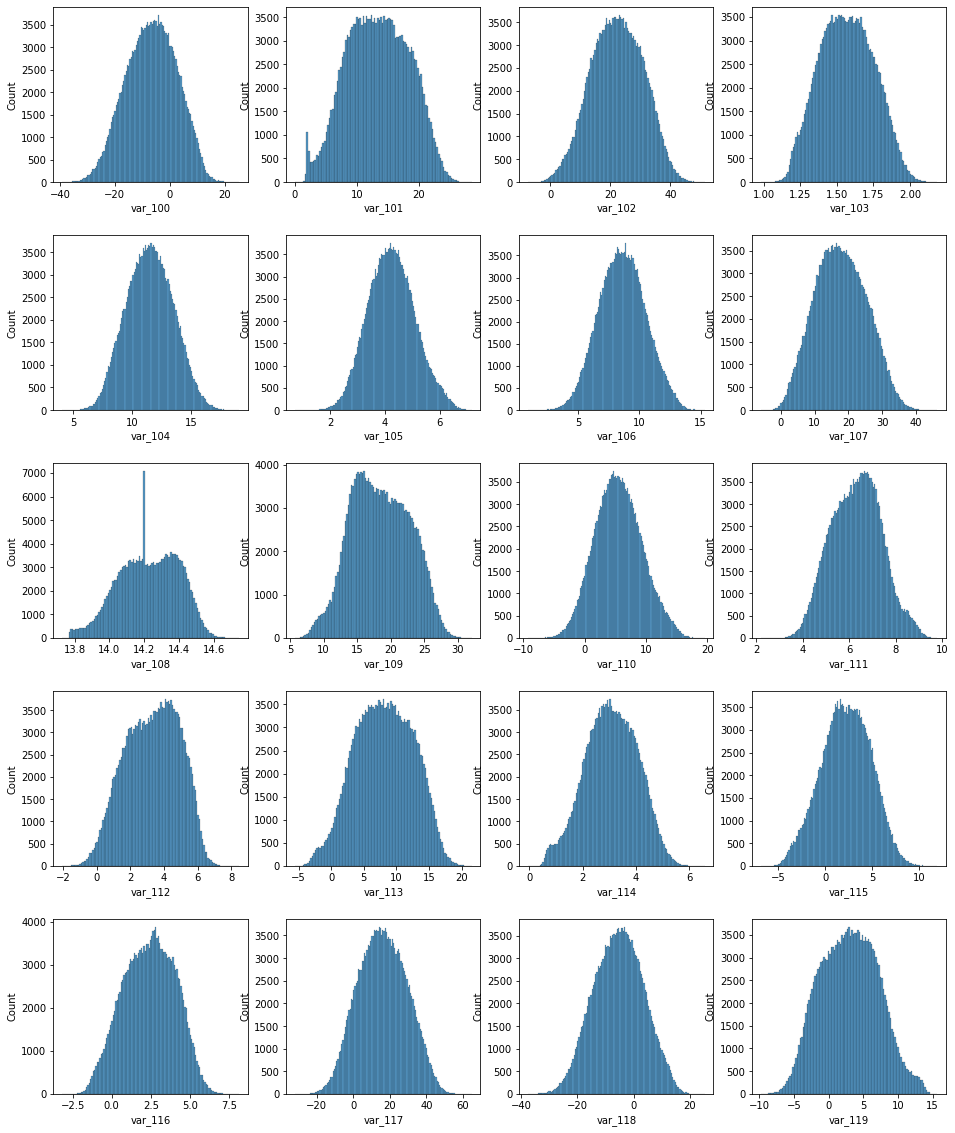

In [69]:
start = 5
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

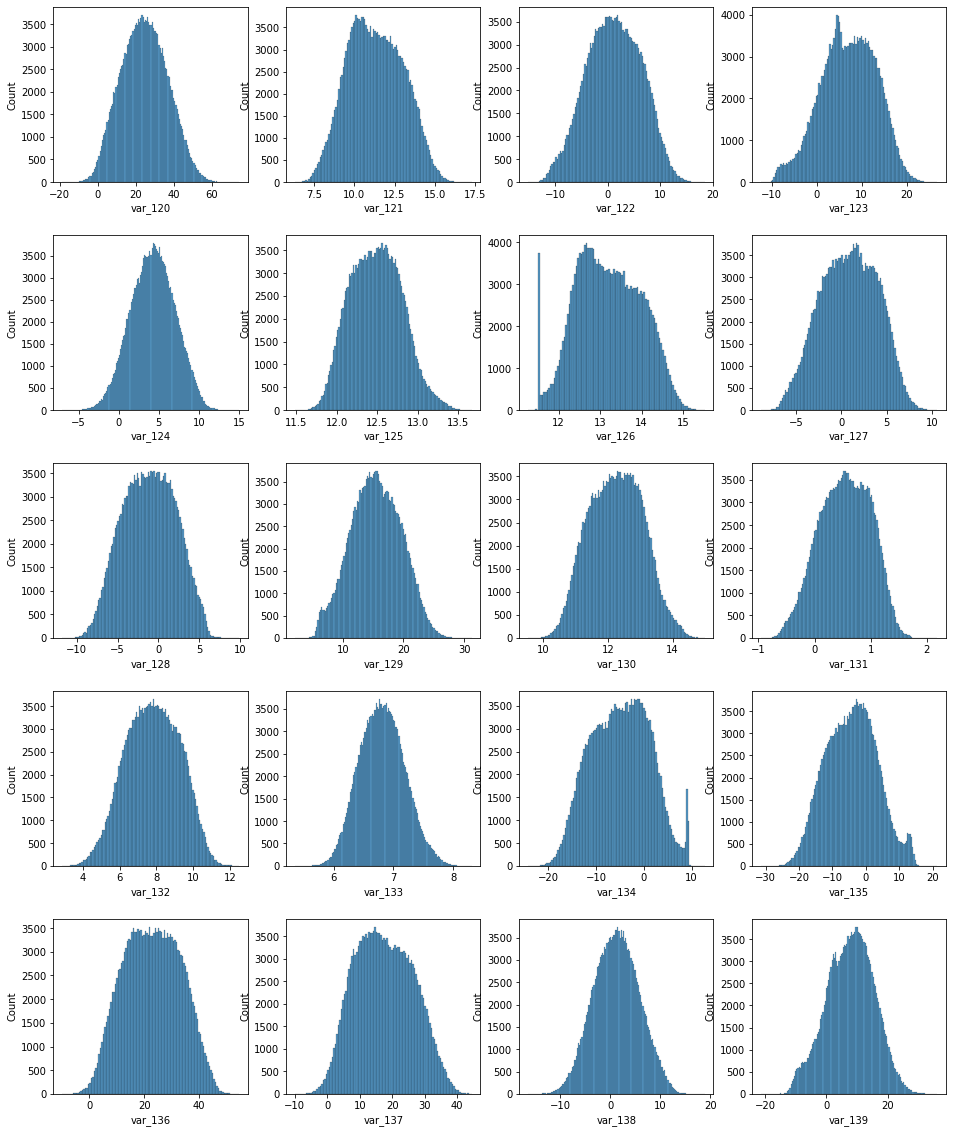

In [70]:
start = 6
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

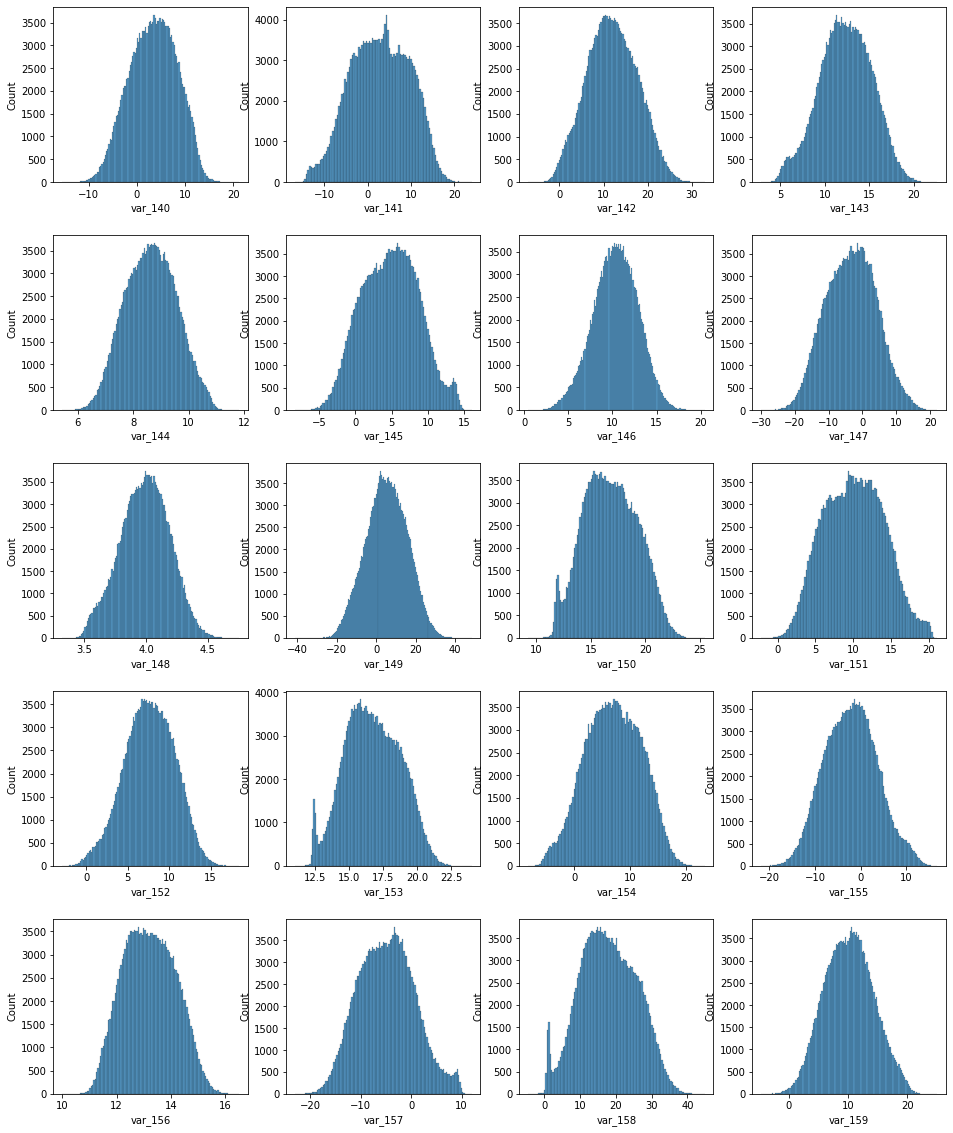

In [71]:
start = 7
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

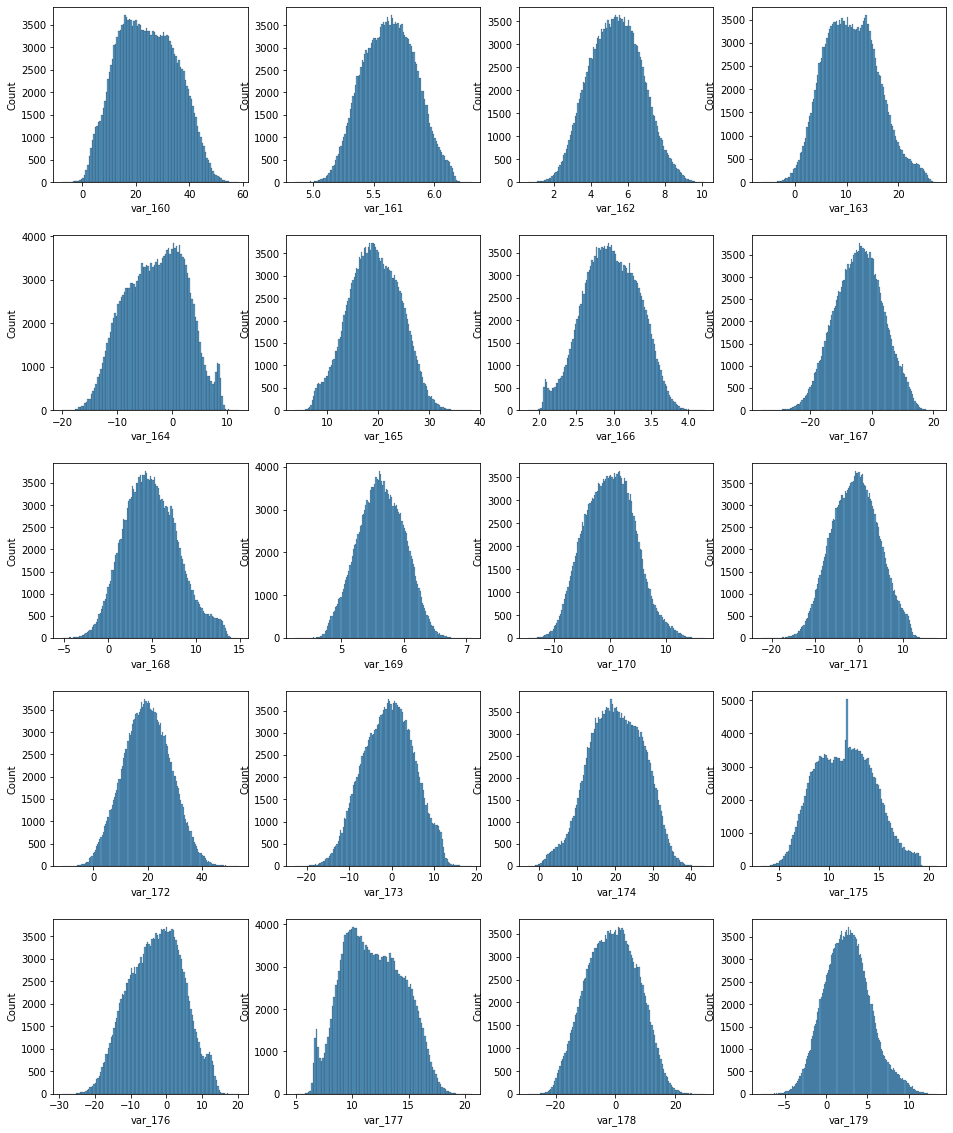

In [72]:
start = 8
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)

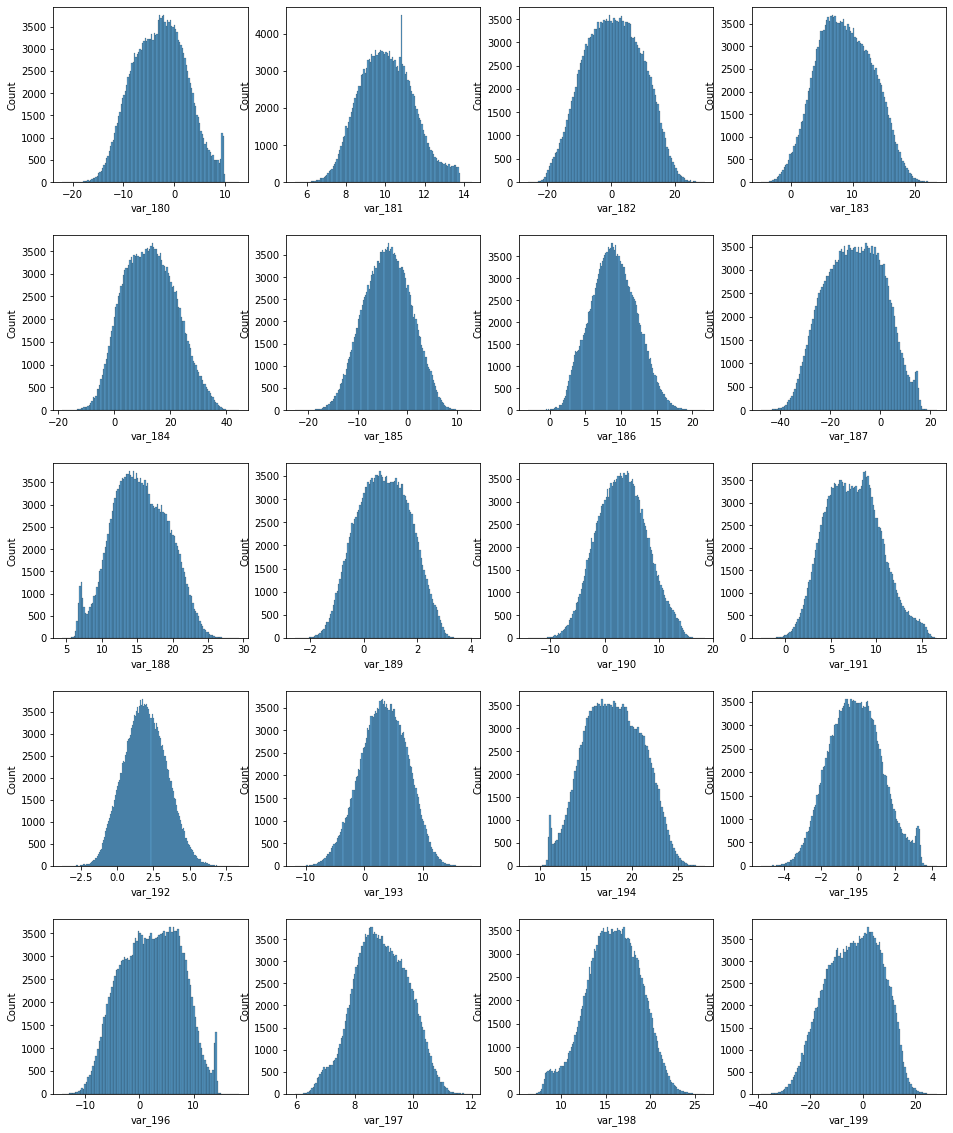

In [73]:
start = 9
step = 20
idx = range(start * step, (start + 1) * step)

var_names = ["var_%d"%i for i in idx]
plot_hist(df_train, var_names)